In [ ]:
# This project will show visual graph why it is better to attemps a 3 point shoot rather than a 2 pointer. 

  3-Point: 35.7%
  2-Point: 51.1%
  3-Point Shot: 1.0717 points
  2-Point Shot: 1.0221 points
==== Regression Analysis: 3 point attempt and wins ====
Regression Equation: y = 0.3277x + 0.3914
R² = 0.0251
Pearson r = 0.1584
p-value = 0.003913
Mean of residuals = 6.7286e-17
Std of residuals = 0.1448


==== Regression Analysis: 2 point attempt and wins ====
Regression Equation: y = -0.3277x + 0.7191
R² = 0.0251
Pearson r = -0.1584
p-value = 0.003913
Mean of residuals = 7.4015e-17
Std of residuals = 0.1448




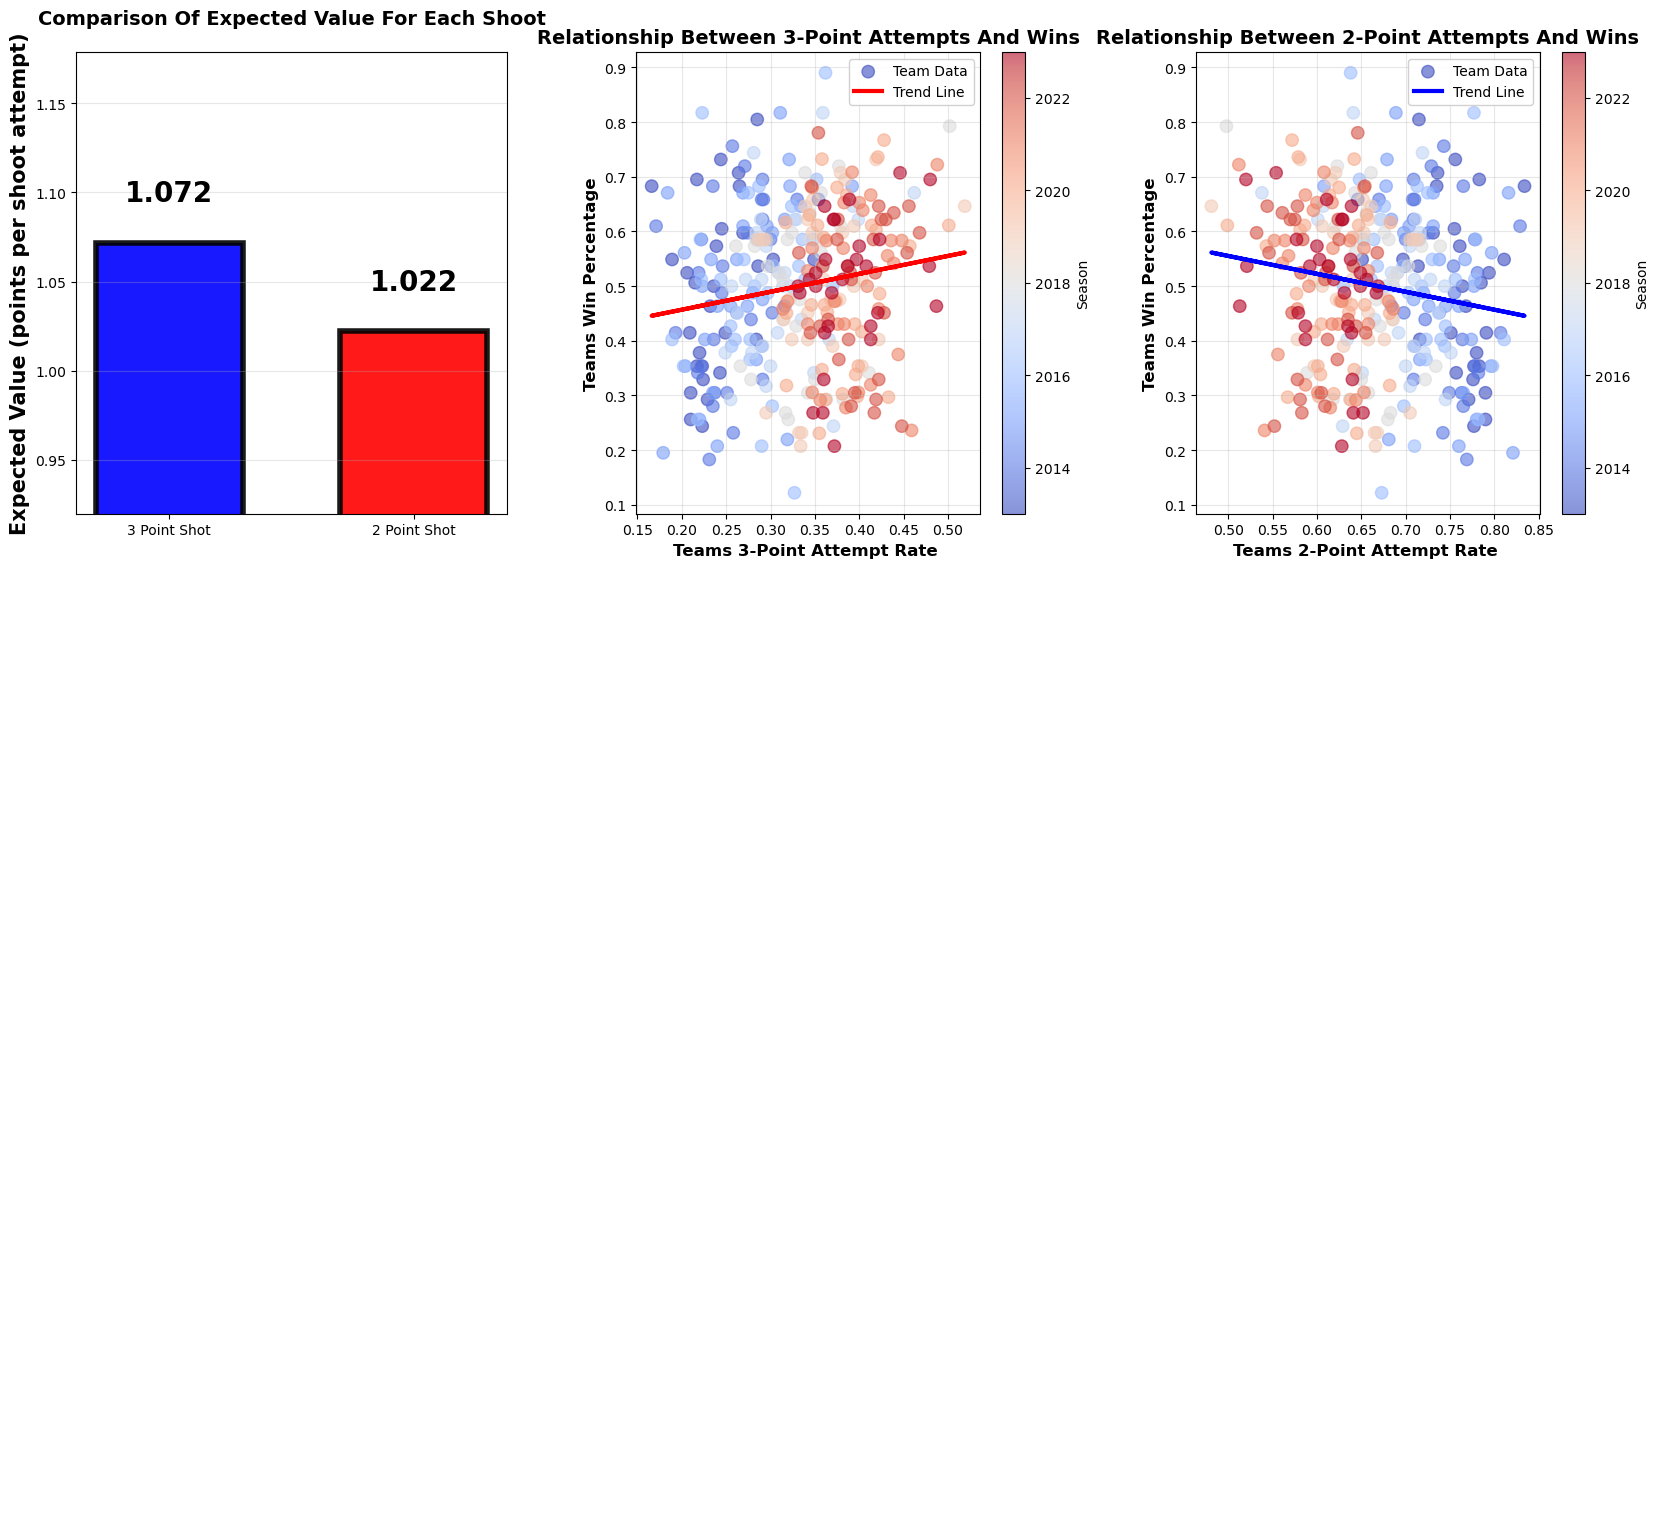

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# We are going to load the data set from kaggle:
pergame_df = pd.read_csv('pergame_stats_total.csv')
advanced_df = pd.read_csv('advanced_stats_total.csv')

# Now we will convert the year from our dataset into numeric form:
pergame_df['Year'] = pd.to_numeric(pergame_df['Year'], errors='coerce')
advanced_df['Year'] = pd.to_numeric(advanced_df['Year'], errors='coerce')

# Then we will use these function to filter the season 2013-2023 from our dataset:
pergame_filter = pergame_df[(pergame_df['Year'] >= 2013) & (pergame_df['Year'] <= 2023)].copy()
advanced_filter = advanced_df[(advanced_df['Year'] >= 2013) & (advanced_df['Year'] <= 2023)].copy()

# Now we will convert the shoothing and winning statistic into numeric from: 
pergame_filter['3P'] = pd.to_numeric(pergame_filter['3P'], errors='coerce')
pergame_filter['3PA'] = pd.to_numeric(pergame_filter['3PA'], errors='coerce')
pergame_filter['2P'] = pd.to_numeric(pergame_filter['2P'], errors='coerce')
pergame_filter['2PA'] = pd.to_numeric(pergame_filter['2PA'], errors='coerce')
advanced_filter['W'] = pd.to_numeric(advanced_filter['W'], errors='coerce')
advanced_filter['L'] = pd.to_numeric(advanced_filter['L'], errors='coerce')
advanced_filter['3PAr'] = pd.to_numeric(advanced_filter['3PAr'], errors='coerce')

# We will merge both shooting data and wins data in the same dataframe:
df = pd.merge(pergame_filter, advanced_filter[['Team', 'Year', 'W', 'L', '3PAr']], 
              on=['Team', 'Year'], how='inner')

# Then, we are going to calculation the teams shooting percentage from the study years:
df['3P%'] = df['3P'] / df['3PA']
df['2P%'] = df['2P'] / df['2PA']
df['W%'] = df['W'] / (df['W'] + df['L'])
df['2PAr'] = 1 - df['3PAr']

# Now let's clean our dataset to remove any missing data
df = df.dropna(subset=['3P%', '2P%', 'W%', '3PAr', '2PAr']).copy()

# Now we will calculate the expected value of each shoot with the average shooting percentage of each shoot:
avg_3p_pct = df['3P%'].mean()
avg_2p_pct = df['2P%'].mean()
exp_value_3pt = avg_3p_pct * 3
exp_value_2pt = avg_2p_pct * 2


# Now lets show the shooting percentage and the expect value for each shoot:

print(f"  3-Point: {avg_3p_pct*100:.1f}%")
print(f"  2-Point: {avg_2p_pct*100:.1f}%")
print(f"  3-Point Shot: {exp_value_3pt:.4f} points")
print(f"  2-Point Shot: {exp_value_2pt:.4f} points")


# Let's show the regression analysis:
def regression_analysis(x, y, label):
    x_vals = x.values.reshape(-1, 1)
    y_vals = y.values
    
# This fuction will create a linear model regression :
    model = LinearRegression()
    model.fit(x_vals, y_vals)
    
# Let's find th slope and intercept of our function:
    slope = model.coef_[0]
    intercept = model.intercept_
    
# This functions will predict our regression line:
    y_pred = model.predict(x_vals)
    
# Lets find the R^2 of our graph: 
    r2 = r2_score(y_vals, y_pred)
    
#Lets find the correlation of our graph:
    r, pval = stats.pearsonr(x_vals.flatten(), y_vals)
    residuals = y_vals - y_pred

# With all the information we have lets print our regression analysis: 
    print(f"==== Regression Analysis: {label} ====")
    print(f"Regression Equation: y = {slope:.4f}x + {intercept:.4f}")
    print(f"R² = {r2:.4f}")
    print(f"Pearson r = {r:.4f}")
    print(f"p-value = {pval:.6f}")
    print(f"Mean of residuals = {np.mean(residuals):.4e}")
    print(f"Std of residuals = {np.std(residuals):.4f}")
    print("\n")
    
    return model, y_pred, slope, intercept, r2, r, pval

# Regression analysis for 3 points
model_3pa, y_pred_3pa, slope_3pa, intercept_3pa, r2_3pa, r_3pa, pval_3pa = \
    regression_analysis(df['3PAr'], df['W%'], "3 point attempt and wins")

# Regression analysis for 2 points
model_2pa, y_pred_2pa, slope_2pa, intercept_2pa, r2_2pa, r_2pa, pval_2pa = \
    regression_analysis(df['2PAr'], df['W%'], "2 point attempt and wins")

# We will create visualization to be able to plot our graphs:
fig = plt.figure(figsize=(20, 6))
gs = fig.add_gridspec(1, 3, wspace=0.3)


# Now lets show graph 1 which represent the expected value of each shoot 
graph_1 = fig.add_subplot(gs[0, 0])

#Lets write the lable for our chart
type_shoot = ['3 Point Shot', '2 Point Shot']

#Lets add the expected value calculated earlier: 
exp_vals = [exp_value_3pt, exp_value_2pt]

#Lets add the color for our bar chart:
colors = ['blue', 'red']

# This function will graph our bar-chart
bars = graph_1.bar(type_shoot, exp_vals, color=colors, alpha=0.9, edgecolor='black', linewidth=4, width=0.6)
graph_1.set_ylabel('Expected Value (points per shoot attempt)', fontsize=15,fontweight='bold')
graph_1.set_title('Comparison Of Expected Value For Each Shoot', fontsize=14, pad=20,fontweight='bold')
graph_1.set_ylim([min(exp_vals)*0.9, max(exp_vals)*1.1])
graph_1.grid(True, alpha=0.3, axis='y', zorder=1)

# Now we are going to write the value of expected value for each shot on top of their repectif bar:
for bar, val, pct, points in zip(bars, exp_vals, [avg_3p_pct, avg_2p_pct], [3, 2]):
    height = bar.get_height()
    graph_1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{val:.3f}', ha='center', va='bottom',
             fontsize=20, fontweight='bold', color='black')
    graph_1.text(bar.get_x() + bar.get_width()/2., height * 0.65,
             f'{pct:.1%}', ha='center', va='center',
             fontsize=18, color='white', fontweight='bold')
    graph_1.text(bar.get_x() + bar.get_width()/2., height * 0.35,
             f'× {points} pts', ha='center', va='center',
             fontsize=16, color='white', fontweight='bold')

# Now lets plot the graph 2 which represent the relationship between 3 points attemps and wins  
graph_2 = fig.add_subplot(gs[0, 1])
scatter1 = graph_2.scatter(df['3PAr'], df['W%'], alpha=0.6, s=80,c=df['Year'], cmap='coolwarm', label='Team Data')
line1 = graph_2.plot(df['3PAr'], y_pred_3pa, "r-", linewidth=3, label='Trend Line')
graph_2.set_xlabel('Teams 3-Point Attempt Rate ', fontsize=12, fontweight='bold')
graph_2.set_ylabel('Teams Win Percentage', fontsize=12, fontweight='bold')
graph_2.set_title('Relationship Between 3-Point Attempts And Wins', fontsize=14, fontweight='bold')
graph_2.grid(True, alpha=0.3)
graph_2.legend(loc='best', fontsize=10, framealpha=0.9)
plt.colorbar(scatter1, ax=graph_2, label='Season')

# Now lets plot the graph 3 representing the relationship between the 2 points attempts and wins
graph_3 = fig.add_subplot(gs[0, 2])
scatter2 = graph_3.scatter(df['2PAr'], df['W%'], alpha=0.6, s=80,c=df['Year'], cmap='coolwarm', label='Team Data')
line2 = graph_3.plot(df['2PAr'], y_pred_2pa, "b-", linewidth=3, label='Trend Line')
graph_3.set_xlabel('Teams 2-Point Attempt Rate ', fontsize=12, fontweight='bold')
graph_3.set_ylabel('Teams Win Percentage', fontsize=12, fontweight='bold')
graph_3.set_title('Relationship Between 2-Point Attempts And Wins', fontsize=14, fontweight='bold')
graph_3.grid(True, alpha=0.3)
graph_3.legend(loc='best', fontsize=10, framealpha=0.9)
plt.colorbar(scatter2, ax=graph_3, label='Season')

  